# 🌞 Solar Data - EDA & Cleaning: Benin

* Goal: Profile, clean, and explore Benin's solar dataset so it's ready for comparison and ranking across countries.

## 🛠️ Setup & Imports

We load the necessary packages and prepare the notebook for data profiling and EDA.  
The solar data for **Benin** is loaded from the raw dataset folder.

In [1]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from solar_eda import load_raw, SolarCleaner, SolarEDA
# === 0. Setup ===
COUNTRY = "benin"  # change this per country
df = load_raw(f"../data/raw/{COUNTRY}.csv")

## 📊 1. Data Profiling

We begin by inspecting the structure and quality of the dataset:

* We visualize the distribution of values (negative, zero, positive) to guide cleaning decisions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

<Axes: title={'center': 'Raw Data - Value Distribution'}, ylabel='Count'>

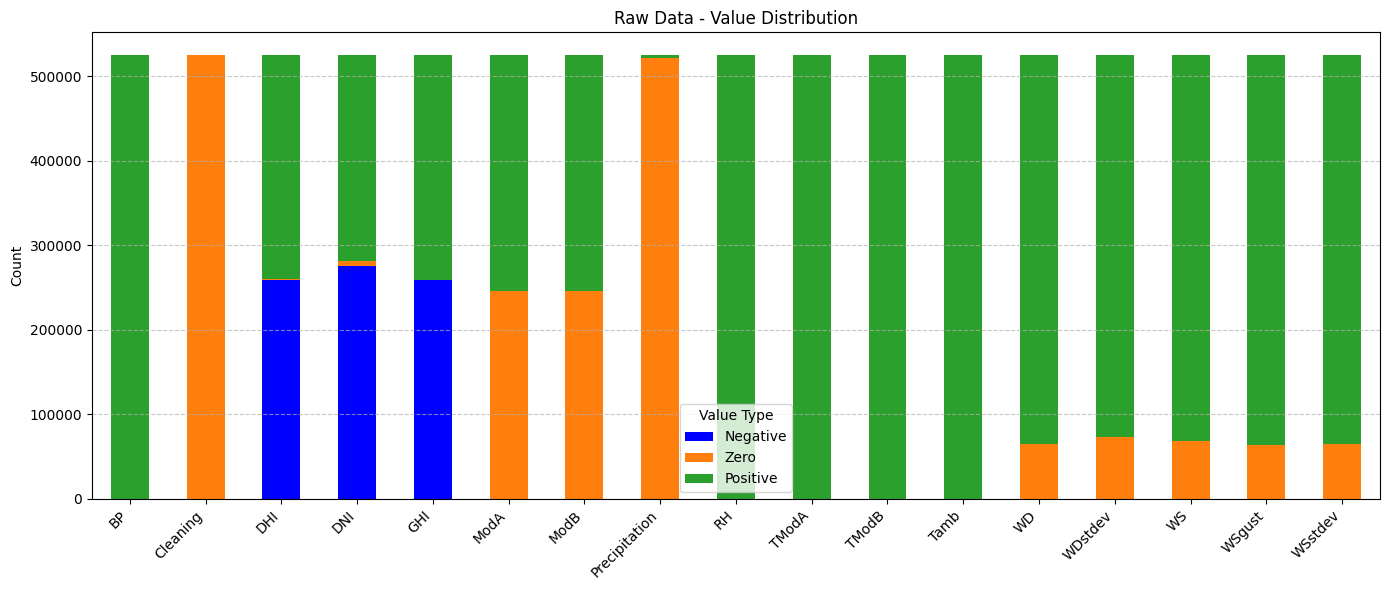

In [2]:
df.info()
df.describe().T  # Summary stats
SolarEDA.missing_table(df, mv_thresh=0.05)  # >5% missing
SolarEDA.dtype_summary(df)
SolarCleaner.plot_value_distribution_summary(df, title="Raw Data - Value Distribution")

## 🧹 2. Cleaning Pipeline

We apply the custom cleaning logic using **SolarCleaner**, which includes:


* The cleaned dataset is then saved locally.

In [3]:
cleaner = SolarCleaner()
df_clean = cleaner.clean(df)
df_clean.to_csv(f"../data/{COUNTRY}_clean.csv", index=False)

Dropping columns: ['Comments']


## 📈 3. Time Series Analysis

We explore the temporal behavior of key variables:

* **line_overview()** shows overall trends over time.
* **diurnal_curve()** captures solar performance across the day.
* **monthly_facets()** highlights seasonal or monthly variations.

These insights help identify time-based patterns and anomalies.

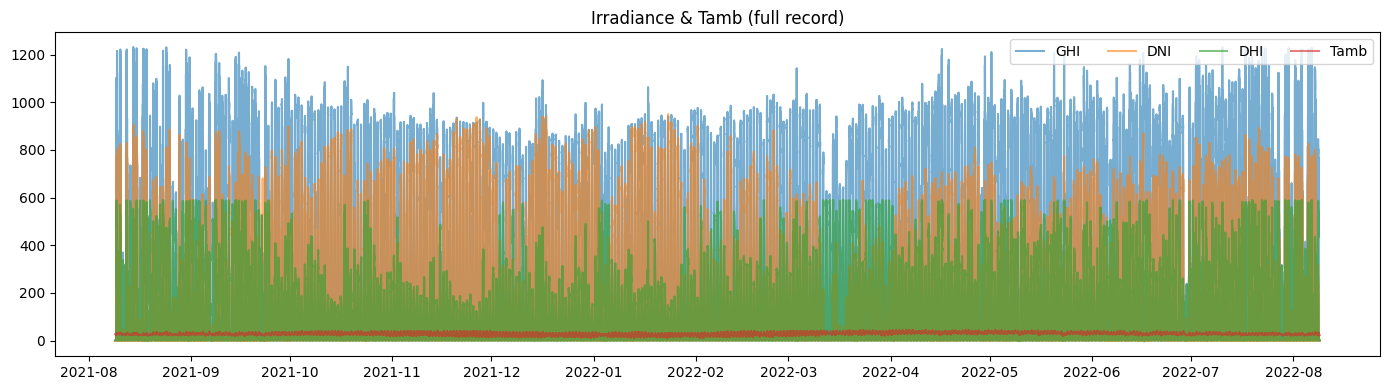

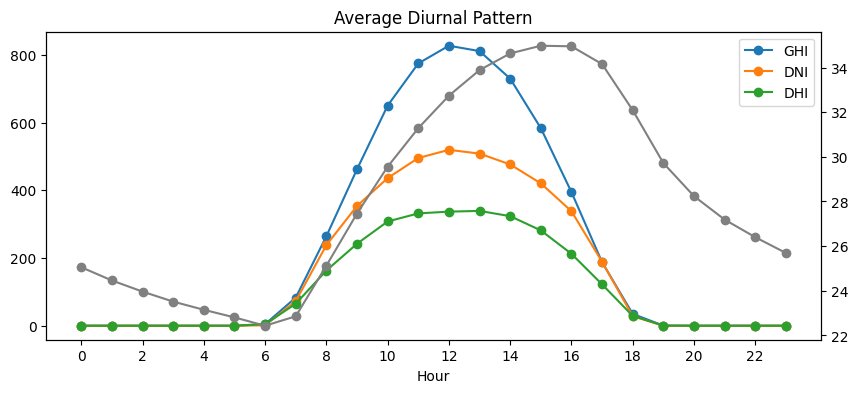

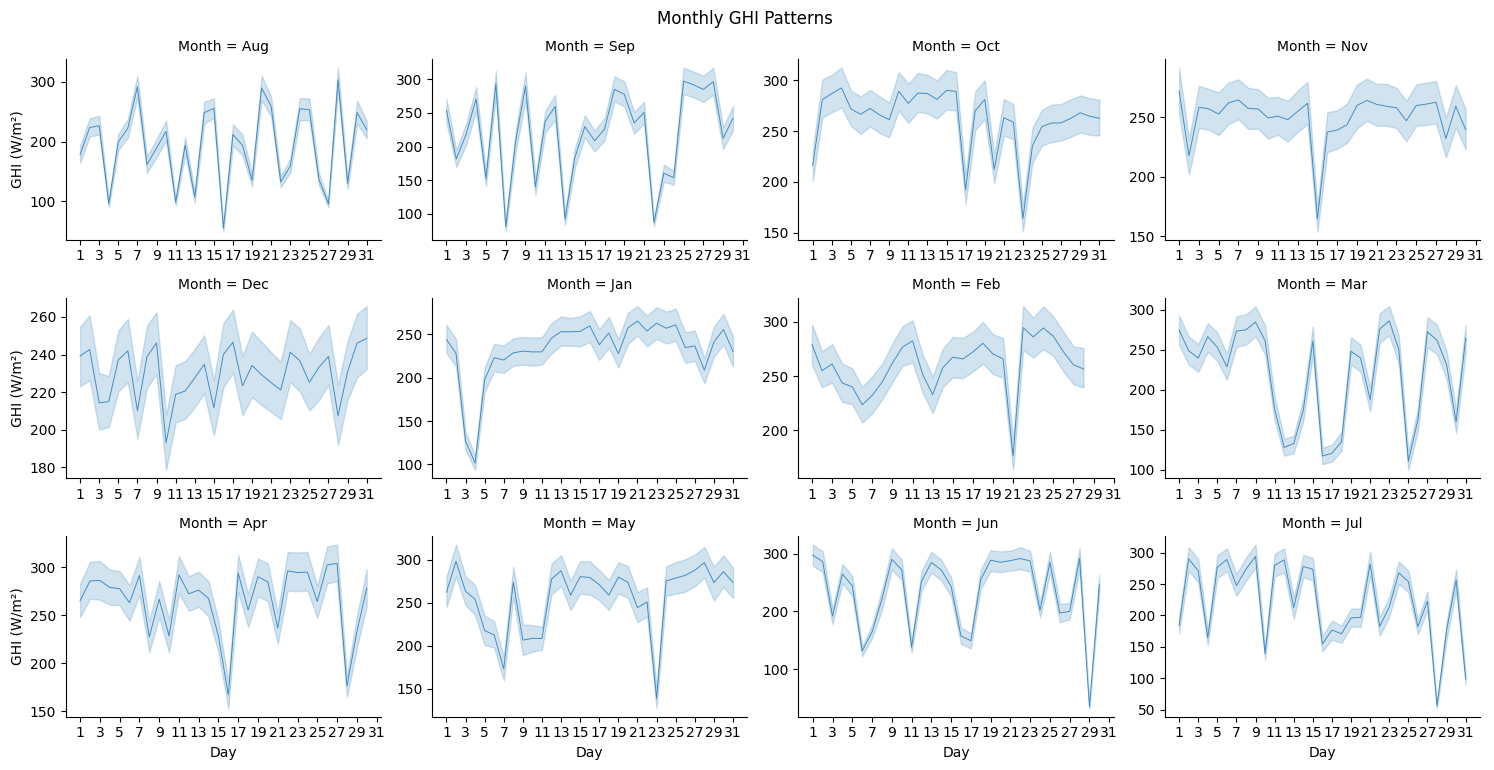

In [4]:
SolarEDA.line_overview(df_clean)
SolarEDA.diurnal_curve(df_clean)
SolarEDA.monthly_facets(df_clean)

## 🧼 4. Cleaning Impact

We evaluate how the **Cleaning** flag (e.g., physical panel cleaning) affects power output:

* Average values of **ModA** and **ModB** are compared before vs. after cleaning events.
* This analysis helps understand operational effects on performance.

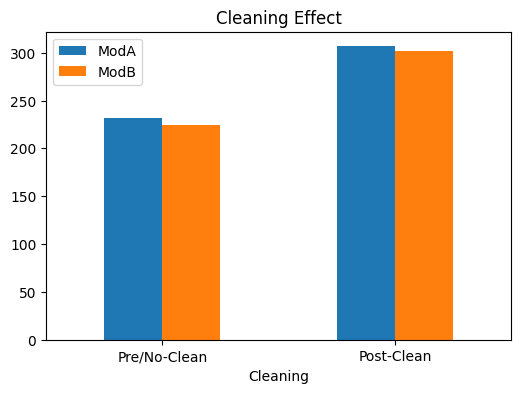

In [5]:
if 'Cleaning' in df_clean.columns:
    SolarEDA.cleaning_impact(df_clean)

## 🔗 5. Correlation & Relationships

We examine the correlation matrix between key engineered features:

* Focused on solar irradiance, module temperature, humidity, and time features.
* Includes both heatmap and optional scatter plots (e.g., **wind speed** vs. **GHI**).

This helps us identify linear relationships and potential multicollinearity.

<Axes: title={'center': 'Correlation Matrix'}>

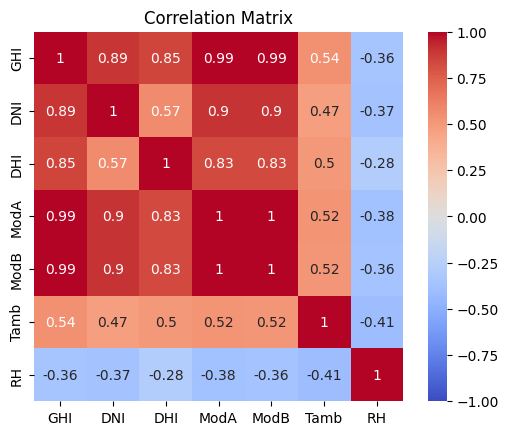

In [7]:
engineered_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH']
SolarEDA.corr_heatmap(df_clean, engineered_cols, only_engineered=False)

## 💨 6. Wind & Distribution

We visualize wind conditions and general variable distributions:

* Wind rose plot summarizes direction and intensity.
* Histograms show distribution of key variables like **GHI** and **WS**.

These insights are useful for both energy yield and system design decisions.

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

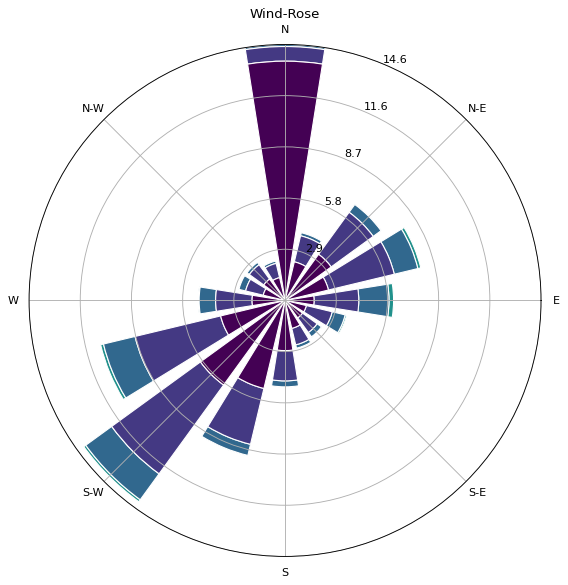

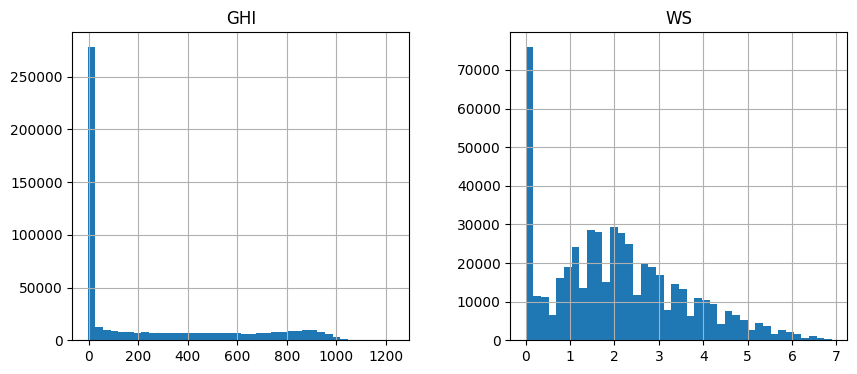

In [8]:
SolarEDA.wind_rose(df_clean)
df_clean[['GHI', 'WS']].hist(figsize=(10,4), bins=40)

## 🌡️ 7. Temperature & Humidity Interactions

We analyze how relative humidity (**RH**) correlates with:

* Ambient temperature (**Tamb**)
* Global Horizontal Irradiance (**GHI**)

This helps explain atmospheric influences on solar generation and heat buildup.

<Axes: xlabel='RH', ylabel='GHI'>

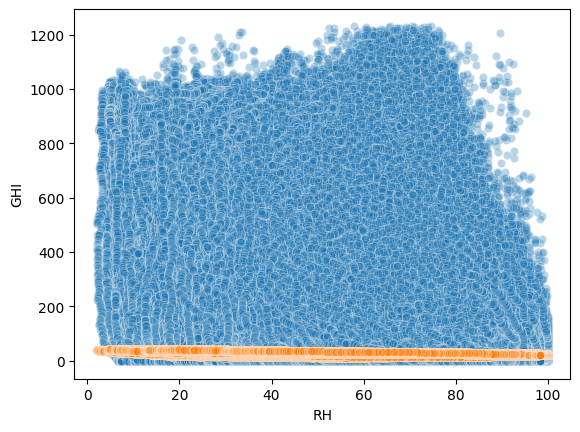

In [9]:
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.3)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.3)

## 🔵 8. Bubble Chart: GHI vs Temperature

We visualize a multi-variable relationship:

* X-axis: Ambient Temperature (**Tamb**)
* Y-axis: Solar Irradiance (**GHI**)
* Bubble Size: Relative Humidity (**RH**)

This gives a compact overview of how climate affects solar output.

<Axes: title={'center': 'Bubble Chart – GHI vs Tamb (bubble = RH)'}, xlabel='GHI (W/m²)', ylabel='Tamb (°C)'>

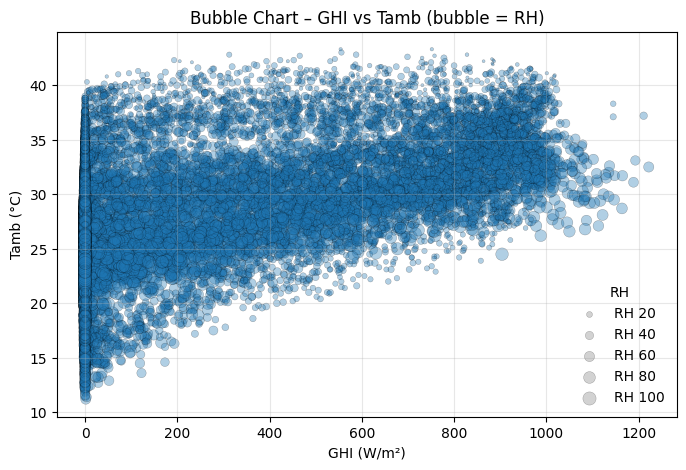

In [10]:
SolarEDA.bubble_ghi_tamb(df_clean)

## 🧮 9. Value Distribution After Cleaning

We revisit the value distribution plot:

* Shows how many values in each column are negative, zero, or positive.
* Helps verify that cleaning steps were effective and no unexpected values remain.

<Axes: title={'center': 'Cleaned Data - Value Distribution'}, ylabel='Count'>

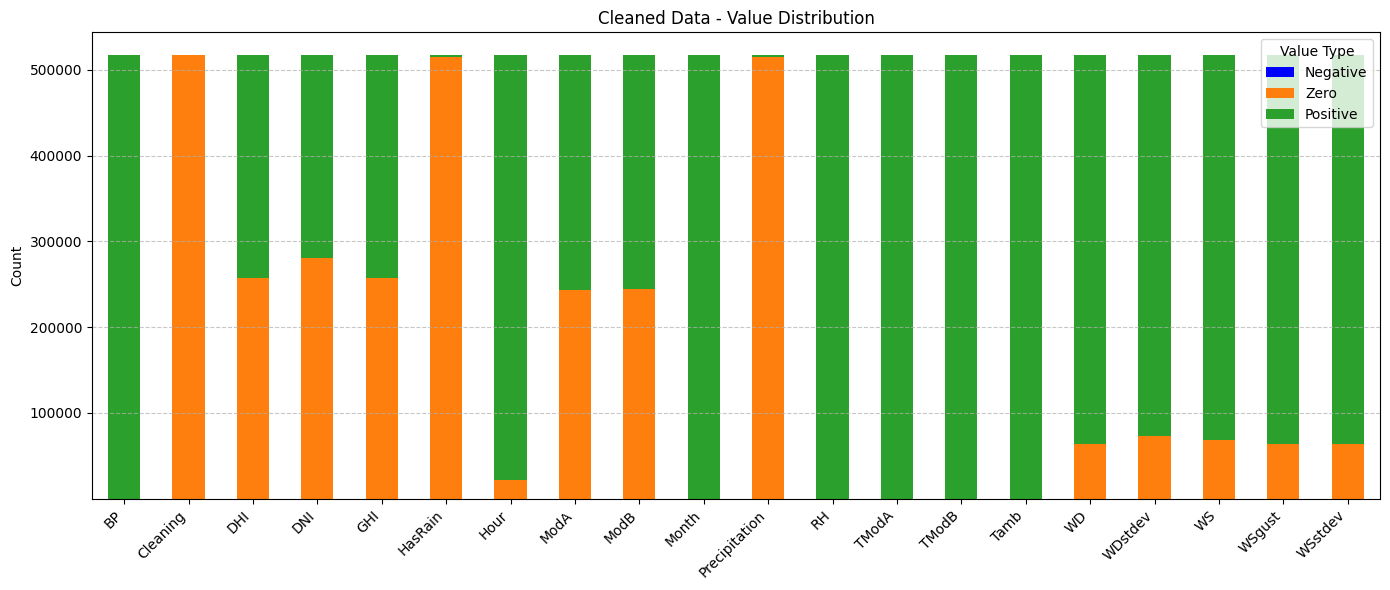

In [11]:
SolarCleaner.plot_value_distribution_summary(df_clean, title="Cleaned Data - Value Distribution")

## 💾 10. Save Cleaned Data

The cleaned dataset is saved for use in regional comparison and ranking tasks.  
Ensure the **data/** folder is included in **.gitignore** to avoid committing large CSV files.

In [12]:
df_clean.to_csv(f"../data/{COUNTRY}_clean.csv", index=False)
print(f"Cleaned data saved for {COUNTRY}.")

Cleaned data saved for benin.
